# **Customer Churn Prediction - Telco Dataset**

**Submitted by:** Maxim Gorohovski



## **1. Project Overview**
This project analyzes a telecommunications company's customer data to **predict customer churn**. By identifying factors that drive churn, the company would be able to implement targeted retention strategies.

#### **Goal**
To predict whether a customer is likely to leave the company (churn) based on usage patterns, contract type, and other features. Our mission is to identify **what** triggers the customers to churn and **suggest strategies to mitigate it**.


**Dataset source:**

 [Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)

----------------------------------------------



## **2. Why is Customer Churn Important?**

- **Improves service and product offerings**: showcasing areas where customers disengage.

- **Boosts retention strategies**: Learning about early warnings allows proactive interventions.

- **Increases revenue**: Keeping existing customers is cheaper and more profitable than constantly acquiring new ones.

### **How Do We Predict Churn?**
We approach this problem using standard data science methodology:

1. **Exploratory Analysis**

2. **Data Cleaning and Preprocessing**

3. **Feature Engineering**

4. **Model Training**

5. **Model Evaluation and Tuning**

6. **Business insights and Recommendations**


## **3. Understanding the Dataset**

## **Dataset Overview**
The dataset contains **7,043 customers records** and **21 features**, covering:
- **Churn status** (target variable).

- **Services used**: phone, internet, online security, streaming, tech support, etc.

- **Account details**: tenure, contract type, billing method, charges.

- **Demographics**: gender, senior citizen status, partner/dependents.

### **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
import warnings
from sklearn.exceptions import ConvergenceWarning


### **Importing the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/telco-customer-churn.csv/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


### **Initial Observations**
- Column have clear and descriptive names

- No NaNs or duplicate, but some columns need type conversion

- **There is a class imbalance in the dataset**: ~73% non-churners vs. ~27% churners


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- **Tenure**
  - Average tenure: ~32 months (≈2.5 years)
  
  - Max tenure: 72 months (6 years)
  
  - 25% of all customers have tenure ≤ 9 months
  
  - 50% have tenure ≤ 29 months (~2.5 years)

- **Monthly Charges**
 - Average monthly charge: $65

 - Range: \$18.25 - \$118.75

 - Standard deviation: ~30, meaning significant variation among customers

## **4. Exploratory Data Analysis**

We formulated hypotheses about which features might drive churn and tested them with visualizations


1. **Higher Monthly Charges ➡ Churn**

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

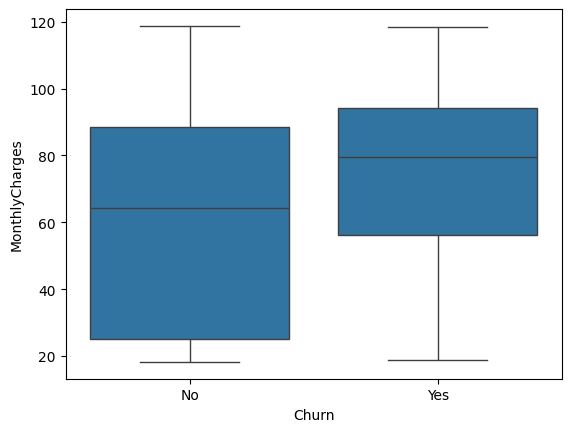

In [ ]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)

- Customers with higher monthly charges often churn, but many still stay.

- High cost alone is not the only factor.

2. **Early Tenure ➡ Churn**

In [ ]:
df[df['tenure'] < 12]['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.517158
Yes,0.482842


- Nearly **48%** churn within the first 12 months.

- Low tenure is a major churn risk.

3. **Analyzing Churn by Tenure Groups**

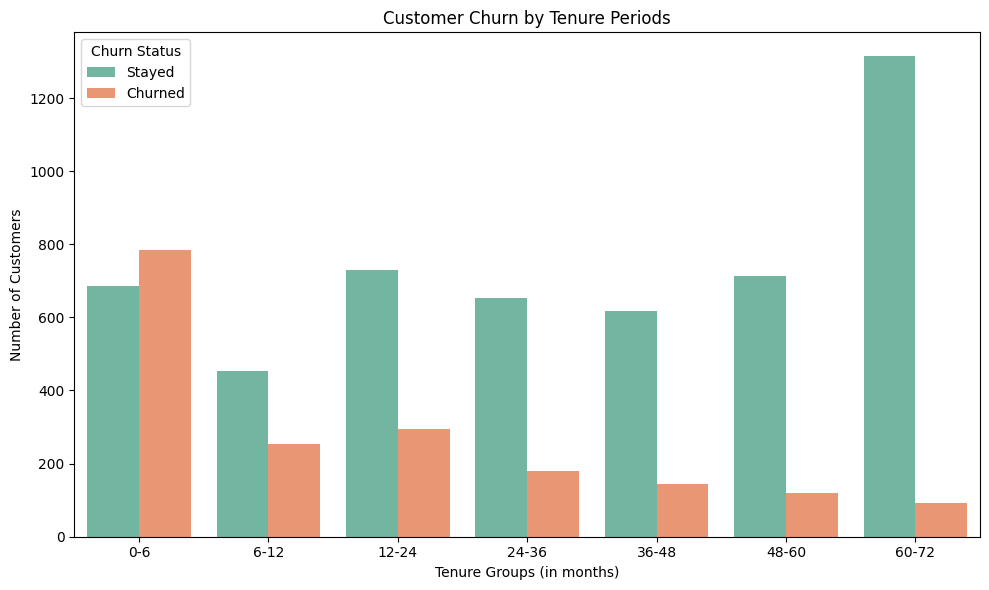

In [ ]:
df['TenureGroup'] = pd.cut(df['tenure'],bins=[0,6,12,24,36,48,60,72],labels=['0-6','6-12','12-24','24-36','36-48','48-60','60-72'])
plt.figure(figsize=(10,6))
sns.countplot(x='TenureGroup', hue='Churn',data=df, palette='Set2')
plt.title('Customer Churn by Tenure Periods')
plt.xlabel('Tenure Groups (in months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['Stayed','Churned'])
plt.tight_layout()
plt.show()
df.drop(columns=['TenureGroup'], inplace=True)


- Low-tenure groups see higher churn rates.

- A small fraction of customers churn even after 60+ months.

In [ ]:
df[(df['Churn'] == 'Yes') & (df['tenure'] > 60)] # 60 was chosen because it was a high enough, reflective tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
104,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
335,4322-RCYMT,Male,0,Yes,Yes,68,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),75.80,5293.95,Yes
339,1343-EHPYB,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.40,6603,Yes
402,0979-PHULV,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.45,7007.6,Yes
430,9063-ZGTUY,Female,0,Yes,Yes,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,1182.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,3090-HAWSU,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.60,6876.05,Yes
6813,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.5,Yes
6824,8444-WRIDW,Female,1,No,No,66,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.45,5224.35,Yes
6945,6797-LNAQX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.5,Yes


- 93 such customers, they are 1% of the total customers.

- Many of them have fiber optic internet service, perhaps it can also be a significant indicator of customer churn.


4. **Internet Service ➡ Churns**

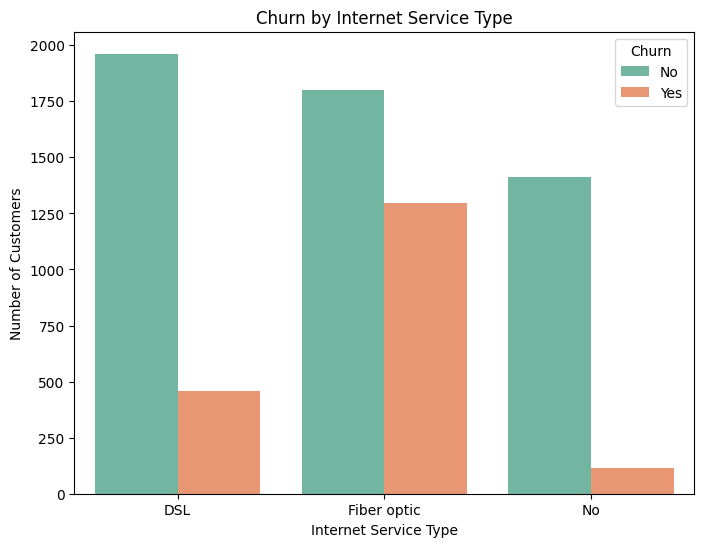

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService',hue='Churn',data=df,palette='Set2')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

- **Fiber optic** users show higher churn than DSL/no internet customers.

5. **Contract Types ➡ Churns**

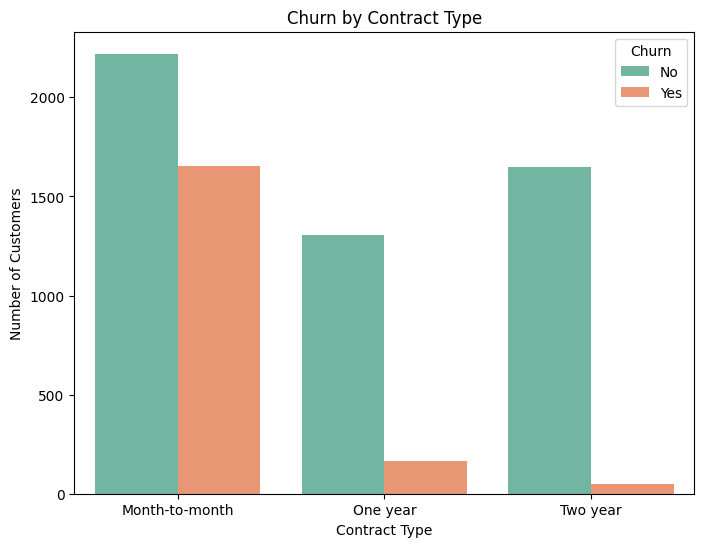

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Contract',hue='Churn',data=df,palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

- **Month-to-month** has the highest churn.

- Two year contracts are very effective, they reduce churn.

6. **Tech Support ➡ Churns**

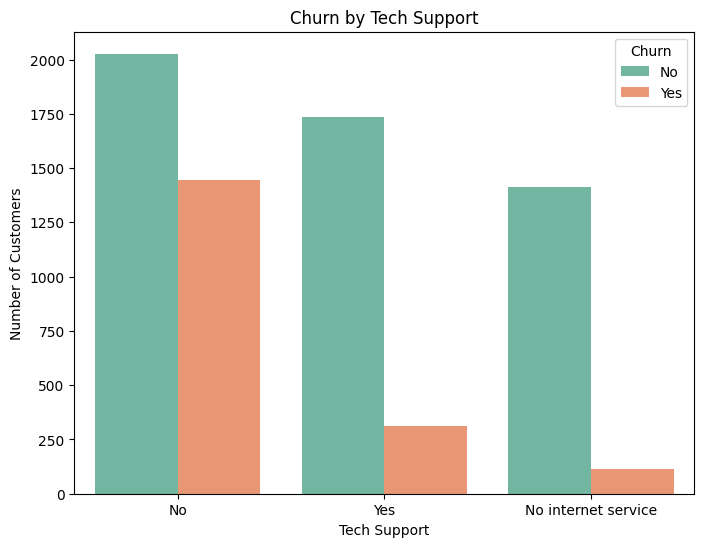

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='TechSupport',hue='Churn',data=df,palette='Set2')
plt.title('Churn by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.show()

- Customers who don't have tech support may churn more, but the correlation is not very strong

7. **Gender ➡ Churns**

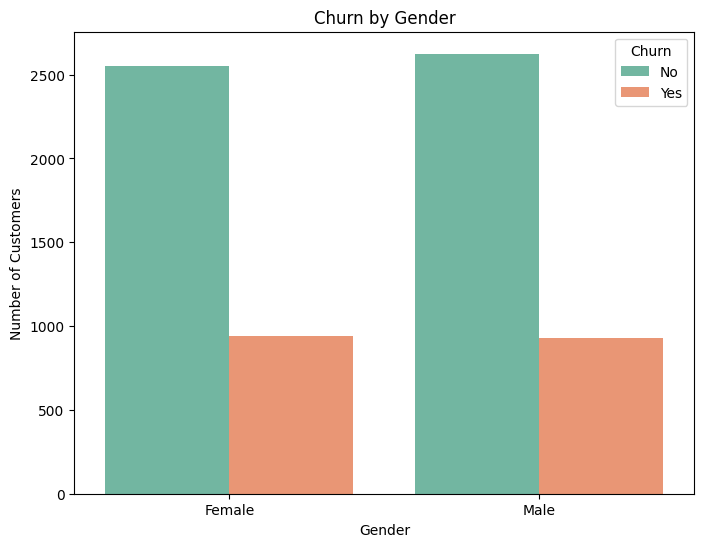

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender',hue='Churn',data=df,palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

- No significant difference between male/female churn rates

####**Insights**
- **Tenure** and **Contract types** strongly influence churn risk

- **Fiber optic** internet associates with higher churn

- **Monthly charges** are correlated with churn but are not the sole factor

- **Gender** and **Tech Support** seem less significant

## **5. Data Cleaning**

1. **Dropped `customerID` column**

In [ ]:
df = df.drop(columns=['customerID']) # Dropping TenureGroup that we've made for the visualizations section

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


2. **Phone & Internet Services**:
 - Customers **without phone service** cannot have multiple lines (`MultipleLines`).

 - Customers **without internet service** cannot have online services (`OnlineSecurity`,`OnlineBackup`,etc.).

 - **'No phone service'** and **'No internet service'** are the same as **'No'**, so these values are not needed.


In [ ]:
cols_to_change = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']

for col in cols_to_change:
  df[col] = df[col].replace({'No phone service': 'No', 'No internet service' :'No'})

In [ ]:
internet_related_columns = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for internet_related_column in internet_related_columns:
  df.loc[df['InternetService'] == 'No', internet_related_column] = 'No' # Customer with no internet service can't have other internet services

df.loc[df['PhoneService'] == 'No', 'MultipleLines'] = 'No' # Customer with no phone service can't have multiple lines

3. **Handling** `TotalCharges` **(Converted from Object to Numeric)**

- Converted from object to numeric

- Filled empty values (new customers) with 0.

In [ ]:
df['TotalCharges'].astype(str).str.strip().eq('').sum()

np.int64(11)

In [ ]:
df[df['TotalCharges'].astype(str).str.strip().eq('')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # Empty values will be replaced with NaN
df['TotalCharges'] = df['TotalCharges'].fillna(0) # All the NaN values will be replaced with 0s

4. **Mapping Yes/No columns to 1/0 for ML compatibility**


In [ ]:
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in cols:
 df[col] = df[col].map({'Yes': 1, 'No': 0})

**Checking Unique Values in All Columns**

In [ ]:
for col in df.columns:
  print(f"{col} - unique values:")
  print(df[col].unique())

gender - unique values:
['Female' 'Male']
SeniorCitizen - unique values:
[0 1]
Partner - unique values:
[1 0]
Dependents - unique values:
[0 1]
tenure - unique values:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService - unique values:
[0 1]
MultipleLines - unique values:
[0 1]
InternetService - unique values:
['DSL' 'Fiber optic' 'No']
OnlineSecurity - unique values:
[0 1]
OnlineBackup - unique values:
[1 0]
DeviceProtection - unique values:
[0 1]
TechSupport - unique values:
[0 1]
StreamingTV - unique values:
[0 1]
StreamingMovies - unique values:
[0 1]
Contract - unique values:
['Month-to-month' 'One year' 'Two year']
PaperlessBilling - unique values:
[1 0]
PaymentMethod - unique values:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges - unique

5. **Checking for Outliers in Charges**

In [ ]:
print("Customers with MonthlyCharges < 0:", df[df['MonthlyCharges'] < 0].shape[0])
print("Customers with TotalCharges < 0:", df[df['TotalCharges'] < 0].shape[0])

Customers with MonthlyCharges < 0: 0
Customers with TotalCharges < 0: 0


- No significant outliers were found.

##**6. Feature Engineering**

**Correlation Analysis**

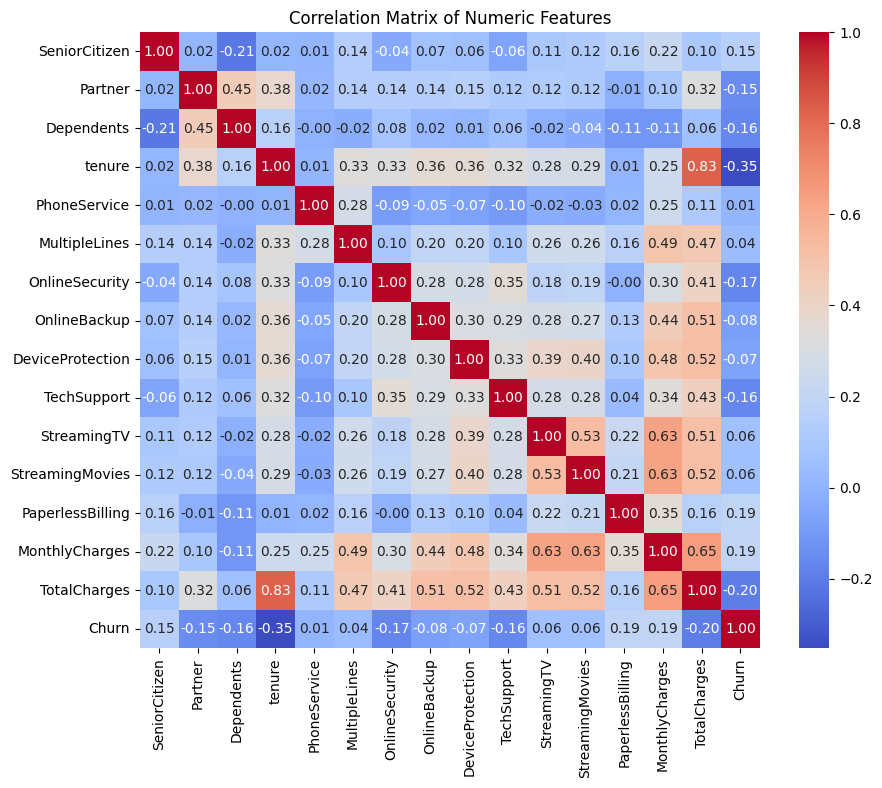

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt= ".2f" , cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

- `tenure` and `TotalCharges` are strongly correlated.

**SpendTrend**
We dropped `TotalCharges` as it is redundant and created:

 - $SpendTrend = MonthlyCharges - (TotalCharges / Tenure)$

 - For `tenure = 0`, we set `SpendTrend = 0`

 - Positive `SpendTrend` means current bill is higher than historical average

 - Negative `SpendTrend` means the customer is paying less now


**Why?** This captures **billing shifts** that may signal churn risk.

In [ ]:
df['SpendTrend'] = np.where(df['tenure'] == 0, 0, df['MonthlyCharges'] - (df['TotalCharges'] / df['tenure']))

In [ ]:
df.drop(columns=['TotalCharges'], inplace=True)

**SpendTrend Correlation to other features**

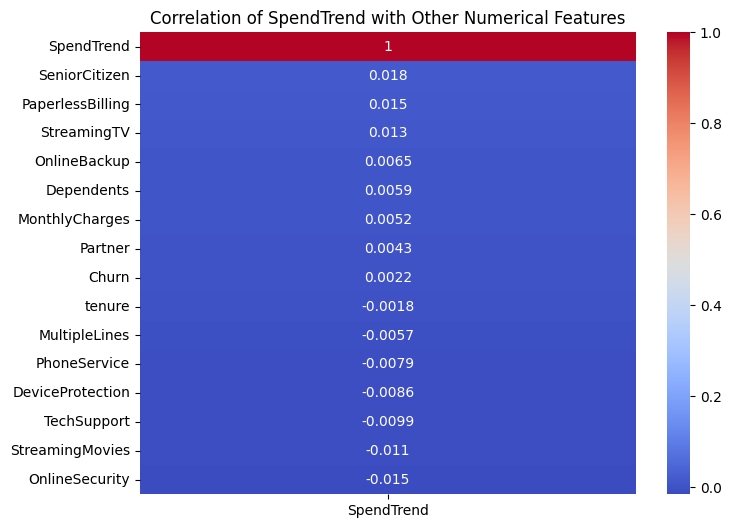

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True)[['SpendTrend']].sort_values(by='SpendTrend', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of SpendTrend with Other Numerical Features")
plt.show()

We can observe that `SpendTrend` is not strongly correlated to other features, which means it may provide independent information not captured elsewhere

**SpendTrend Distribution**

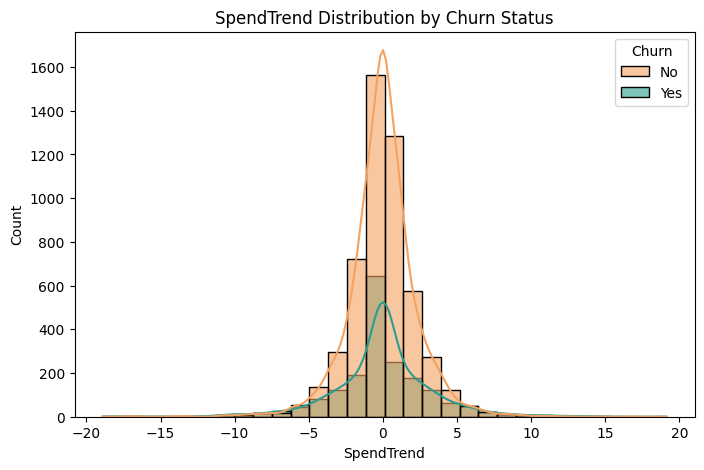

In [ ]:
df['Churn'] = df['Churn'].map({1:'Yes', 0: 'No'})
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='SpendTrend', hue='Churn', kde=True, bins=30, palette=['#F4A261', '#2A9D8F'], alpha=0.6)
plt.title("SpendTrend Distribution by Churn Status")
plt.show()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

- Churners have a wider spread, suggesting more fluctuations.

## **7. Model Training**

We prepared two models:

  1. **Logistic Regression**: for interpretable baseline

  2. **Random Forest**: Handles nonlinear patterns

### **Data Preparation**

1. **Encoding and Scaling**

In [ ]:
one_hot_vector = ['Contract','PaymentMethod','InternetService', 'gender']
df = pd.get_dummies(df, columns=one_hot_vector, drop_first=True) # One-Hot-Encoding


scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'SpendTrend']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

2. **Splitting Data**

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into 80% training and 20% test, stratify will keep churn ratio same in both sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42, stratify=y)


# **8. Logistic Regression**

**GridSearchCV for Hyperparameters**

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500,1000,2000]
}

with warnings.catch_warnings(): # To ignore 'ConvergenceWarning' given in smaller max_iter values
  warnings.filterwarnings('ignore', category=ConvergenceWarning)

  grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, Y_train)

print("Best Parameters: ", grid_search.best_params_)

best_lr_model = grid_search.best_estimator_
y_pred_best = best_lr_model.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, y_pred_best)}")
print(f"ROC AUC: {roc_auc_score(Y_test, best_lr_model.predict_proba(X_test)[:,1])}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_best))

Best Parameters:  {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8019872249822569
ROC AUC: 0.8404737916246866

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



(increasing `max_iter` did not improve performance - therefore we removed warnings)

**Feature Importance - Logistic Regression**

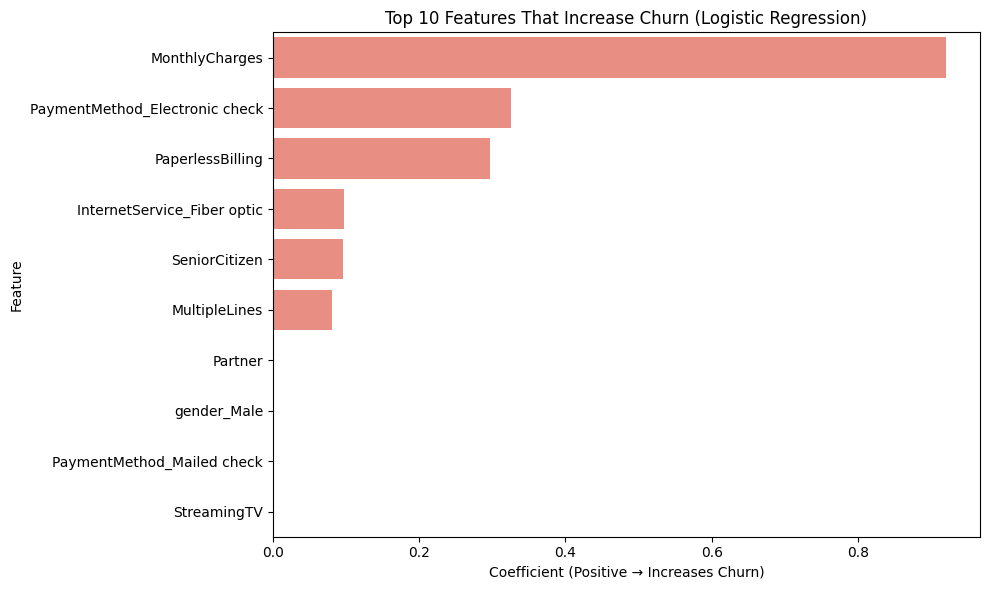

In [ ]:
coefficients = best_lr_model.coef_[0]
feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
top_10 = coef_df.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10, x='Coefficient', y='Feature', color='salmon')
plt.title('Top 10 Features That Increase Churn (Logistic Regression)')
plt.xlabel('Coefficient (Positive → Increases Churn)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

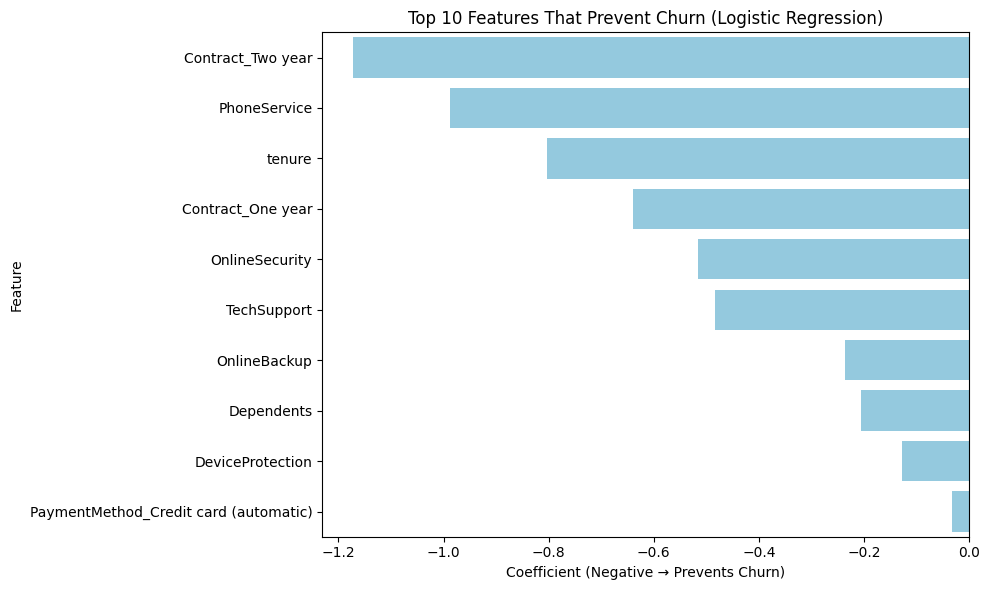

In [ ]:
bottom_10 = coef_df.tail(10).sort_values(by='Coefficient')  # Ensure they're in ascending order

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10, x='Coefficient', y='Feature', color='skyblue')
plt.title('Top 10 Features That Prevent Churn (Logistic Regression)')
plt.xlabel('Coefficient (Negative → Prevents Churn)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Interpretation**: Higher charges, fiber optic internet, and electronic checks increase **churn risk**. Longer contracts and engagement features **reduce churn**.

# **9. Random Forest**

**GridSearchCV + Class Balancing**

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': [True]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search_rf.fit(X_train, Y_train)

print("Best Parameters: ", grid_search_rf.best_params_)
rf_model = grid_search_rf.best_estimator_
y_pred_rf = rf_model.predict(X_test)

y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(Y_test, y_pred_rf)}")
print(f"ROC AUC: {roc_auc_score(Y_test, y_proba_rf)}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_rf))

Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7863733144073811
ROC AUC: 0.8376062414425586

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.60      0.61      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



- Using `class_weight='balanced'` to address ~27% churn minority.

**Feature Importance - Random Forest**

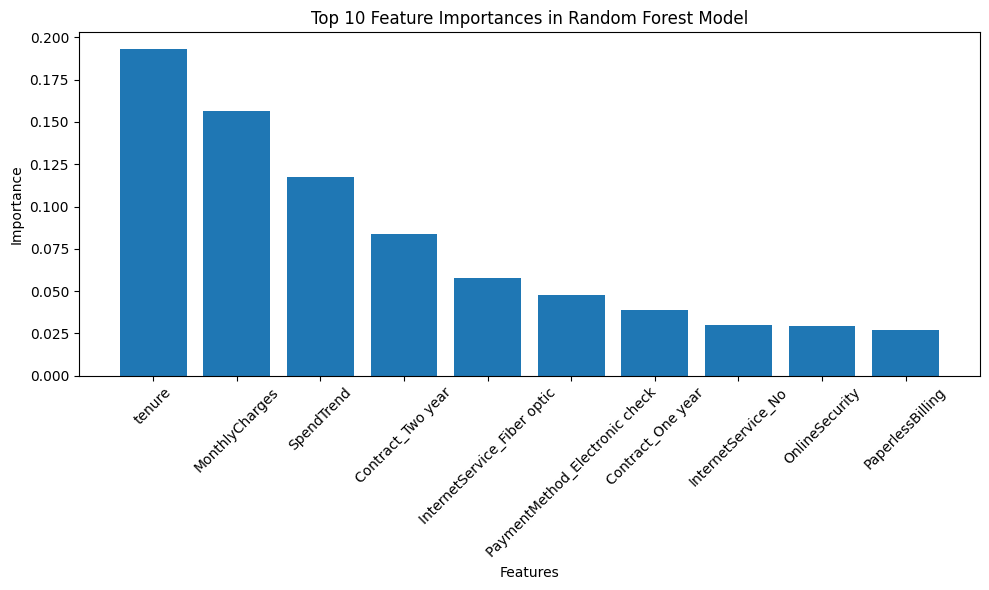

In [ ]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:** Confirms the same key features but does not provide a sign (+ or -). It ties well with the Logistic Regression findings.

# **10. Discussion**

### Model Comparison

| Model                          | Accuracy | ROC AUC | Churn Recall | Churn F1 |
|--------------------------------|----------|---------|-------------|----------|
| **Logistic Regression**        | 80%      | 84%     | 0.53        | 0.58     |
| **Random Forest (Balanced)**   | 78%      | 83%     | 0.61        | 0.60     |


- Random Forest sacrifices a bit of accuracy to achieve higher recall for churners

- Logistic Regression is simpler but misses more churners.


In a **real churn scenario**, recall is critical. That is because catching an at-risk customer early is more important than being perfectly accurate on non-churners. Hence, **Random Forest** might be more business-valuable despite a small accuracy drop.

#**11. Conclusions and Recommendations**

1. **Tenure and Contract Type**: It is suggested to focus on retention offers on early-tenure customers and encourage longer contracts

2. **Monthly Charges**: As shown by both models, high bills correlate with churn - maybe if the company will consider discounts or better plan bundling, it may help with customer churning

3. **Fiber Optic Plans**: It should be fully investigated whether customers are satisfied with the Fiber Optic service quality. Perhaps customers are dissatisfied with the network quality, or maybe there are other competitors that have better pricings for fiber optic plans

4. **Paperless Billing and Electronic Checks**: Customers using these may churn more often. Maybe they are less engaged? Additional research is needed to understand this phenomenon

**Limitations and what can be researched next**

- We only had one-time data, no Time-series or monthly usage. If we had investigated this sort of data, we might've revealed deeper patterns that we couldn't have revealed beforehand

- **Class Imbalance**: We've seen that there is an imbalance between the number of churners and non-churners. We mitigated it with `class_weight='balanced'` in the case of Random Forest model, but oversampling might further improve the recall

- **External Factors**: Competition, marketing campaigns, service satisfaction measures are not included in our dataset, yet these could heavily influence churn decisions.

- **Expanded Feature Engineering**: Future works could involve creating additional features and testing them on current models for further performance gains.

- **Larger Dataset and Advanced Models**: Gathering more data (especially from new customers) would support more powerful algorithms, such as **neural networks**, which often require larger sample sizes for optimal performance.